<h1 id="SCTK-Example-Notebook">SCTK Example Notebook</h1>

<p>This notebook provides an example of running the Single cell toolkit module on a gene expression matrix, provided in GenePattern&#39;s GCT file format with phenotypic information from a cls file.</p>



### Log in to GenePattern
The SingleCellTK module is currently only installed on https://beta.genepattern.org Note that this is NOT the same server as https://gp-beta-ami.genepattern.org or "GenePattern AWS Beta" in the login menu.

Also note that this module will only run for GenePattern user accounts that have been specifically configured due to its use of new features.  Contact Ted (jliefeld@2cloud.ucsd.edu) to get your account added to this list.

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [187]:
import pandas as pd
import io
import warnings
from IPython.display import display, Javascript
from IPython.display import IFrame
from io import StringIO
from gp.data import GCT

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [6]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://beta.genepattern.org/gp", "", ""))

GPAuthWidget()

<h2 id="Running-the-SingleCellTK-module">Running the SingleCellTK module</h2>

<p>SCTK is run by creating a cell of the type &quot;GenePattern&quot; and then selecting the &quot;SCTK&quot; module from the menu presented.&nbsp; This will insert a cell with the SCTK interface as you see below.&nbsp; For details of working with GenePattern notebooks, see the Guides menu at <a href="http://genepattern-notebook.org" target="_blank">http://genepattern-notebook.org</a> for instructions</p>

<p>&nbsp;</p>

<p>For this example we will use the same MAITS gene expression dataset as used in the <a href="https://bioconductor.org/packages/release/bioc/vignettes/singleCellTK/inst/doc/v02-Processing_and_Visualizing_Data_in_the_SingleCellTK.html" target="_blank">SCTK Vignette</a>.&nbsp; For this example we have taken the data after the &quot;Filtering by Annotation&quot; step in the vignette, and written the resulting data out as GenePattern&#39;s standard gct and cls file formats.&nbsp;</p>

<p><a href="https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset.cls" target="_blank">https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset.cls</a> <a href="https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset_hugo.gct" target="_blank">https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset_hugo.gct</a></p>

<p>&nbsp;</p>

<p>If you run this module (the Run button at the top and bottom left) you will generate a new set of outputs.&nbsp; For convenience this notebook also includes results from an old run that I have shared publicly and made persistant so that any user that gets this notebook should be able to access them.</p>

<p>&nbsp;</p>

<h2>Summarizing the input data</h2>

<p>To start, lets take a look at the data we sent to SCTK, this is similar to the summarizeTable action in R, but its not quite as pretty yet.</p>


In [124]:
maits_subset_gct = GCT("https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset_hugo.gct")
maits_subset_gct.shape

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df


(13052, 74)

So with this dataset we hae 13052 genes and 74 samples

In [102]:
df = maits_subset_gct
cols = df.columns
df[df[cols].sum(axis=1).eq(0)].shape[0]

111

And in this dataset we have 111 genes with no expression across all samples 

<p>Question:&nbsp; In the vignette&#39;s summarize table what is meant by</p>

<ol>
	<li>Average number of reads per cell</li>
	<li>Average number of genes per cell</li>
	<li>Samples with &lt;1700 detected genes</li>
</ol>

<p>For the 3rd, I assume it means samples with &lt;1700 genes that have non-zero values, bit for the first two do we have to decode ths sample names (e.g.&nbsp;1-MAIT-Stim-C05_S91) where C05 means cell 5 and S91 means sample 91?&nbsp; However the C#&#39;s and S#&#39;s never repeat so this is either because its a toy dataset or its not a single-cell dataset.</p>

<p>&nbsp;</p>


<h2>On to running the module</h2>


In [7]:
singlecelltoolkit_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00377')
singlecelltoolkit_job_spec = singlecelltoolkit_task.make_job_spec()
singlecelltoolkit_job_spec.set_parameter("assay.file", "https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset_hugo.gct")
singlecelltoolkit_job_spec.set_parameter("cls.file", "https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset.cls")
singlecelltoolkit_job_spec.set_parameter("assay.name", "logtpm")
singlecelltoolkit_job_spec.set_parameter("output.file", "<assay.file_basename>")
singlecelltoolkit_job_spec.set_parameter("Run.PCA", "True")
singlecelltoolkit_job_spec.set_parameter("Run.TSNE", "True")
singlecelltoolkit_job_spec.set_parameter("log.transform", "False")
genepattern.display(singlecelltoolkit_task)

job30353 = gp.GPJob(genepattern.session.get(0), 30353)
genepattern.display(job30353)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00377')

GPJobWidget(job_number=30353)

<h2 id="Visualizing-SCTK -Outputs">Visualizing SCTK&nbsp; Outputs</h2>

<p>&nbsp;</p>

<p>Once the SingleCellTK module has run we have several options for how we can visualize the outputs.&nbsp; We can simply look at the pdf files generated by the SCTK module, or we can create more interactive visualizations within the notebook to allow the users to play with the data.</p>

<p>&nbsp;</p>

<h3>Visualizing PCA</h3>

<p>To start, lets take a look at the PCA output in which we can look at&nbsp;the generated pdf.&nbsp; We can also generate our own dotplot similar to the pdf in the notebook, first we will grab the dataframe, and then we will plot the first 2 dimensions.</p>


In [3]:
import gp
from IPython.display import HTML

@genepattern.build_ui(parameters={ 
    "filename":{
            "type": "file",
        "kinds": ["pdf"]
    },
    "width":{  "type": "number", "default":500},
    "height":{ "type": "number", "default":500},
    "output_var": {
        "name": "results",
        "description": "There are the results",
        "hide": True
    }})
def displayPdf(filename, width, height):
    
    aPdf = gp.GPFile(genepattern.get_session(0), filename)
    # write to a server local file
    localCopyName = aPdf.get_name()
    with open(localCopyName, "wb") as f:
        with aPdf.open() as pdf:
            f.write(pdf.read())
    
    return HTML('<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(localCopyName, (width,height)))





GPUIBuilder(function_import='displayPdf', name='displayPdf', params=[{'name': 'filename', 'label': 'filename', 'optional': False, 'default': '', 'description': '', 'hide': False, 'type': 'file', 'kinds': ['pdf'], 'choices': []}, {'name': 'width', 'label': 'width', 'optional': False, 'default': 500, 'description': '', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'height', 'label': 'height', 'optional': False, 'default': 500, 'description': '', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'output_var', 'label': 'results', 'optional': True, 'default': '', 'description': 'There are the results', 'hide': True, 'type': 'text', 'kinds': None, 'choices': []}])

Now to get the data into a dataframe and plot it

/opt/conda/envs/python3.6/lib/python3.6/site-packages/genepattern/remote_widgets.py:109: PendingDeprecationWarning: get_session will be deprecated in version 1.0, use sessions.get instead
  warnings.warn("get_session will be deprecated in version 1.0, use sessions.get instead", PendingDeprecationWarning)


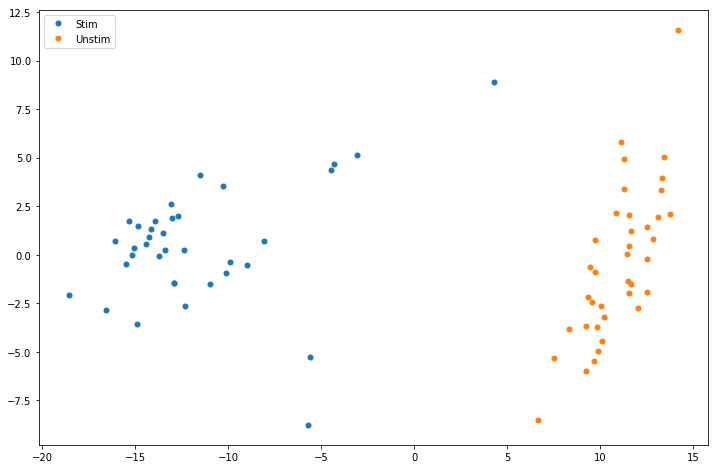

In [179]:

maits_subset_hugo_pca_gct = GCT(job30353.get_file("maits_subset_hugo_PCA.gct"))
cls = "https://datasets.genepattern.org/data/module_support_files/SCTK/maits_subset.cls"
gpfile = gp.GPFile(genepattern.get_session(0), cls)
clsLines =  gpfile.read().splitlines()
labels = np.asarray(clsLines[1].split(), dtype=str)[1:] 
classes = np.asarray(clsLines[2].strip('\n').split(' '), dtype=int)
df = maits_subset_hugo_pca_gct.copy()
df['classes'] = [labels[i] for i in classes]
# import matplotlib.pyplot as plt

groups = df.groupby('classes')
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.show()

<h3>Visualizing TSNE</h3>

<p>We can display TSNE the same way.&nbsp; Here we will do the python plot first and then follow with the pdf for comparison.&nbsp; Note that we already loaded the classes above for PCA</p>


/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df


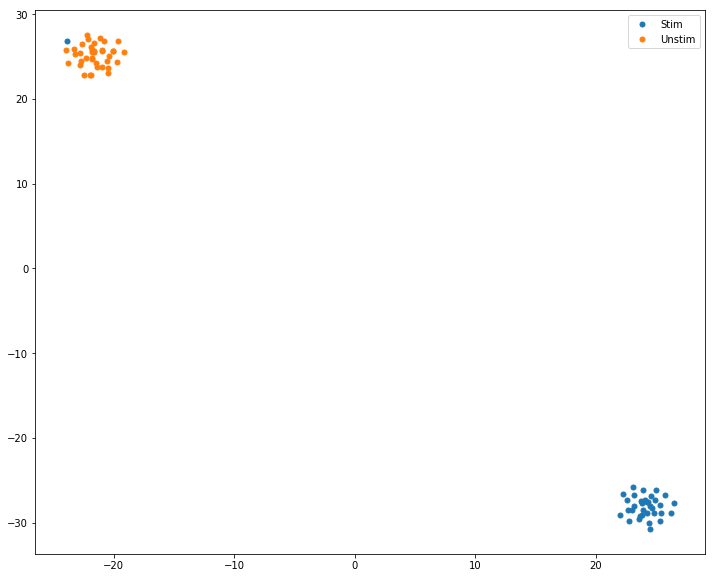

/opt/conda/envs/python3.6/lib/python3.6/site-packages/genepattern/remote_widgets.py:109: PendingDeprecationWarning: get_session will be deprecated in version 1.0, use sessions.get instead
  warnings.warn("get_session will be deprecated in version 1.0, use sessions.get instead", PendingDeprecationWarning)


In [186]:
from gp.data import GCT
maits_subset_hugo_TSNE = GCT(job30353.get_file("maits_subset_hugo_TSNE.gct"))
maits_subset_hugo_TSNE['classes'] = [labels[i] for i in classes]

groups = maits_subset_hugo_TSNE.groupby('classes')
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X1, group.X2, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.show()
displayPdf(job30353.get_file("maits_subset_hugo_TSNE.pdf").get_url(),800,800)

<h2 id="Visualizing-Differential-Expression">Visualizing Differential Expression</h2>

<p>&nbsp;</p>

<p>Now moving on to look at the differntial expression results we have an issue in that we have not yet written out the file containing the MAST results, so that is still needed to continue here</p>


<h1>Experimental Visualizations below</h1>


# <h3>Plotting GCT files in the notebook</h3>

<p>This provides a (potentially interactive) alternative to the pdf outputs.</p>


/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:163: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df


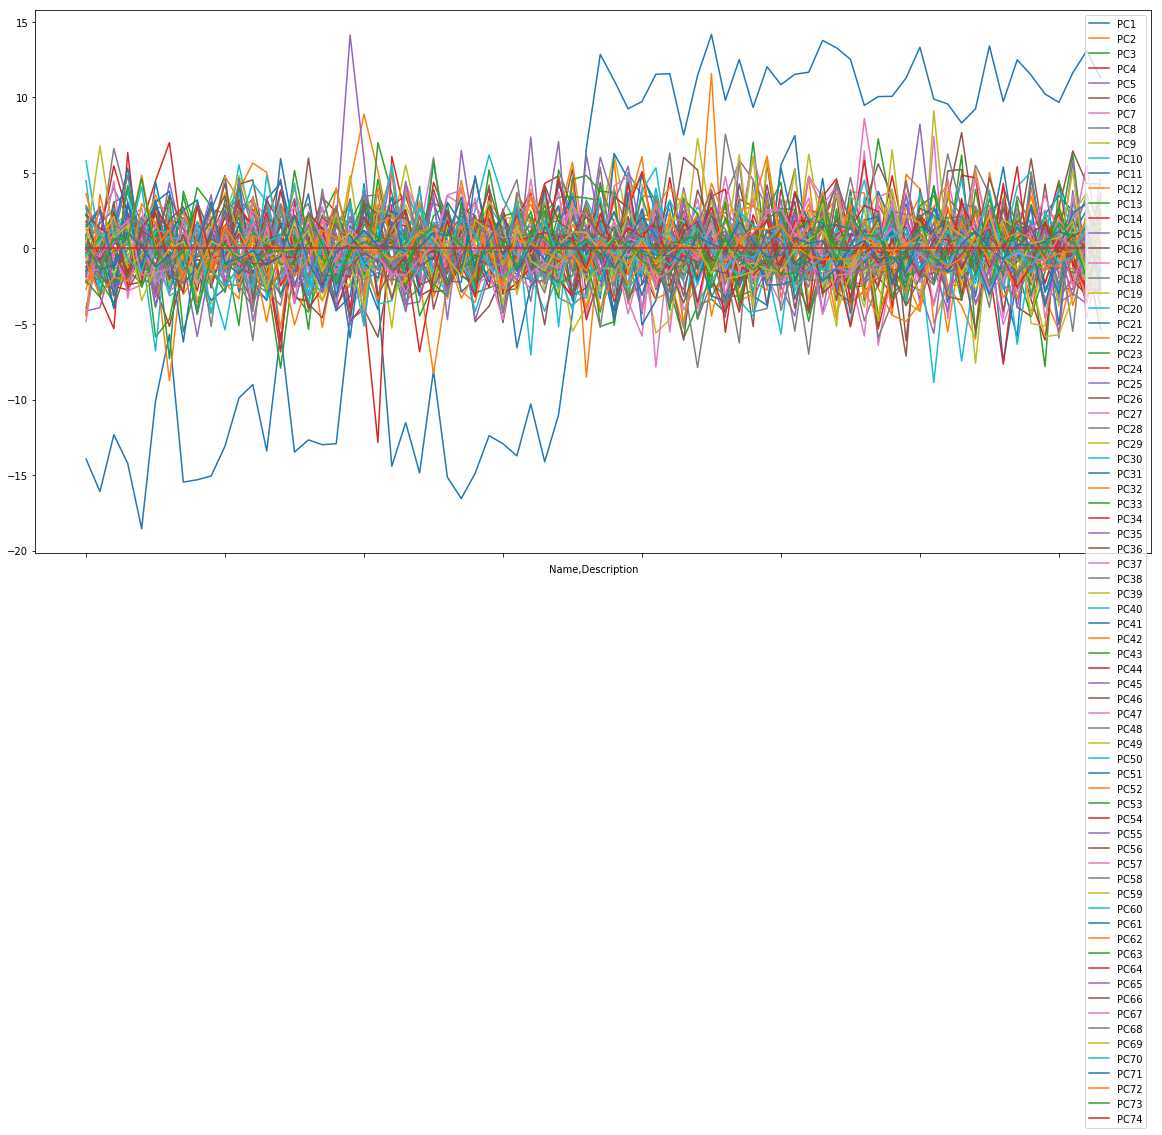

In [11]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
# the next line gets us a dataframe with the PMean for the 4 pattern run
maits_subset_hugo_pca_gct = GCT(job30353.get_file("maits_subset_hugo_PCA.gct"))
maits_subset_hugo_pca_gct.plot(figsize=(20,10))


In [4]:
import gp
from IPython.display import HTML

@genepattern.build_ui(parameters={ 
    "filename":{
            "type": "file",
        "kinds": ["pdf"]
    },
    "width":{  "type": "number", "default":500},
    "height":{ "type": "number", "default":500},
    "output_var": {
        "name": "results",
        "description": "There are the results",
        "hide": True
    }})
def displayPdf(filename, width, height):
    
    aPdf = gp.GPFile(genepattern.get_session(0), filename)
    # write to a server local file
    localCopyName = aPdf.get_name()
    with open(localCopyName, "wb") as f:
        with aPdf.open() as pdf:
            f.write(pdf.read())
    
    return HTML('<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(localCopyName, (width,height)))





GPUIBuilder(function_import='displayPdf', name='displayPdf', params=[{'name': 'filename', 'label': 'filename', 'optional': False, 'default': '', 'description': '', 'hide': False, 'type': 'file', 'kinds': ['pdf'], 'choices': []}, {'name': 'width', 'label': 'width', 'optional': False, 'default': 500, 'description': '', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'height', 'label': 'height', 'optional': False, 'default': 500, 'description': '', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'output_var', 'label': 'results', 'optional': True, 'default': '', 'description': 'There are the results', 'hide': True, 'type': 'text', 'kinds': None, 'choices': []}])

In [5]:
# doing PDF in a tab (iframe or otherwise) the ones in the tabs that are initially hidden 
# do not display properly but end up zoomed down to pinprocks

from IPython.display import IFrame

job = widgets.IntText(
    value=30353,
    description='SCTK Job Number:',
    disabled=False
)

def displayJobInTab(jobNumber):
    #
    #  Example mimic'ing the outputs of the static html example
    #
    #
    #
    #
    # job = gp.GPJob(genepattern.session.get(0), jobNumber)

    job = gp.GPJob(genepattern.session.get(0), 30353)
    diff = None
    regress = None
    thresh=None
    voilin=None
    pca=None
    tsne=None

    for f in job.get_output_files():
        fname = f.get_name()
        fUrl = f.get_url()
        if fname.endswith("_DiffEx.pdf"):
            diff = fUrl
        if fname.endswith("_Regression.pdf"):
            regress = fUrl
        if fname.endswith("_Thresholds.pdf"):
            thresh = fUrl
        if fname.endswith("_Violin.pdf"):
            violin = fUrl
        if fname.endswith("_PCA.pdf"):
            pca = fUrl
        if fname.endswith("_TSNE.pdf"):
            tsne = fUrl
    
    def displayPdf(filename, width, height):
        aPdf = gp.GPFile(genepattern.get_session(0), filename)
        # write to a server local file
        localCopyName = aPdf.get_name()
        with open(localCopyName, "wb") as f:
            with aPdf.open() as pdf:
                f.write(pdf.read())

        return HTML('<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(localCopyName, (width,height)))

    def displayIFrame(filename, width, height):
        return IFrame(filename, width=width, height=height)


    out1 = widgets.Output(layout={'border': '1px solid black'})
    with out1:
        pdf = displayPdf(diff,500,300)
        display(pdf)

    out2 = widgets.Output(layout={'border': '1px solid black'})
    with out2:
        print("IFrame")
        ifr = displayIFrame(pca,500,300)
        display(ifr)
        
    out3 = widgets.Output(layout={'border': '1px solid black'})
    with out3:
        pdf = displayPdf(tsne,500,300)
        display(pdf)


    out4 = widgets.Output(layout={'border': '1px solid black'})
    with out4:
        pdf = displayPdf(violin,500,300)
        display(pdf)
     
    tab = widgets.Tab()
    tab.children = [out1, out2, out3, out4]
    tab.set_title(0, "DiffEx")
    tab.set_title(1, "PCA")
    tab.set_title(2, "TSNE")
    tab.set_title(3, "Violin")
    
    return tab

interact(displayJobInTab, jobNumber=job)

NameError: name 'widgets' is not defined